In [1]:
!pip install -q tensorflow_text
!pip install -q simpleneighbors[annoy]
!pip install -q nltk
!pip install -q tqdm
!pip3 install tensorflow_text>=2.0.0rc
!pip install sentence_transformers
!pip install torch torchvision

     |████████████████████████████████| 4.3 MB 5.0 MB/s 
     |████████████████████████████████| 646 kB 4.7 MB/s 
     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 2.6 MB 40.8 MB/s 
     |████████████████████████████████| 1.2 MB 46.3 MB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 3.3 MB 33.2 MB/s 
     |████████████████████████████████| 636 kB 56.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=47e3fd1af2e81f2d631542b2bcc1128b6d57a309ee46c8148095af69a04e659a
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text
import seaborn as sn
from matplotlib import pyplot as plt
from sentence_transformers import SentenceTransformer

In [3]:
data = pd.read_csv('SICK_data.csv')

**Universal sentence encoder (Transformer)**


In [4]:
module = hub.load('https://tfhub.dev/google/universal-sentence-encoder-qa/3')  


INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-qa/3'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder-qa/3, Total size: 588.94MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-qa/3'.


In [5]:
data.head()

,sentence_A,sentence_B,relatedness_score
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,-0.75
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,-0.10
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,-0.85
3,The young boys are playing outdoors and the ma...,There is no boy playing outdoors and there is ...,-0.30
4,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,-0.20


In [6]:
question_encoding = module.signatures['question_encoder'](
    tf.constant(data.sentence_A)
)
response_encoding = module.signatures['response_encoder'](
    input = tf.constant(data.sentence_B),
    context = tf.constant(data.sentence_B)
)

In [7]:
result = tf.keras.losses.cosine_similarity(response_encoding['outputs'], question_encoding['outputs'])

In [8]:
original_data = data.relatedness_score.iloc[:300]
model_data = result.numpy()[:300]
testing_index = list(range(300))

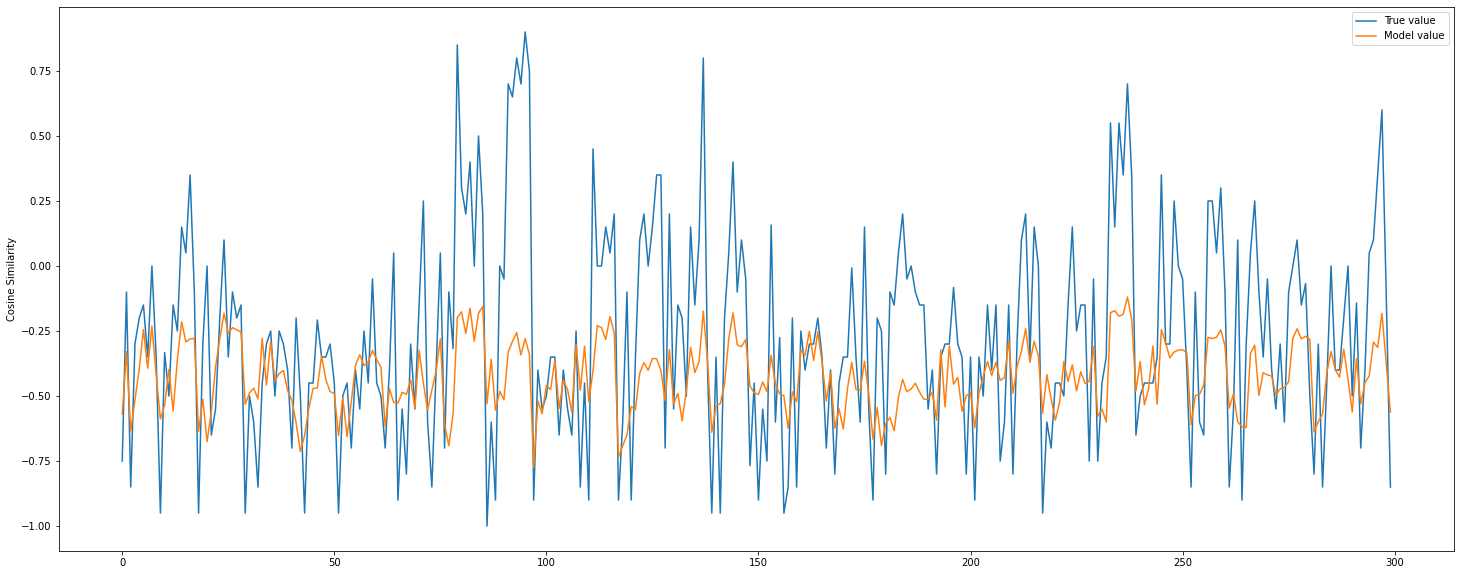

In [10]:
fig, ax = plt.subplots(figsize=(25,10))
sn.lineplot(x=testing_index,y=original_data,label="True value")
sn.lineplot(x=testing_index,y=model_data,label="Model value")
ax.set_ylabel("Cosine Similarity")
ax.legend()
plt.show()

**BERT based model**

In [11]:
model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')
first_encoding = model.encode(data.sentence_A)
second_encoding = model.encode(data.sentence_B)

In [12]:
cosine_similarity_bert = tf.keras.losses.cosine_similarity(first_encoding, second_encoding)

In [13]:
cosine_similarity_bert.shape

TensorShape([9840])

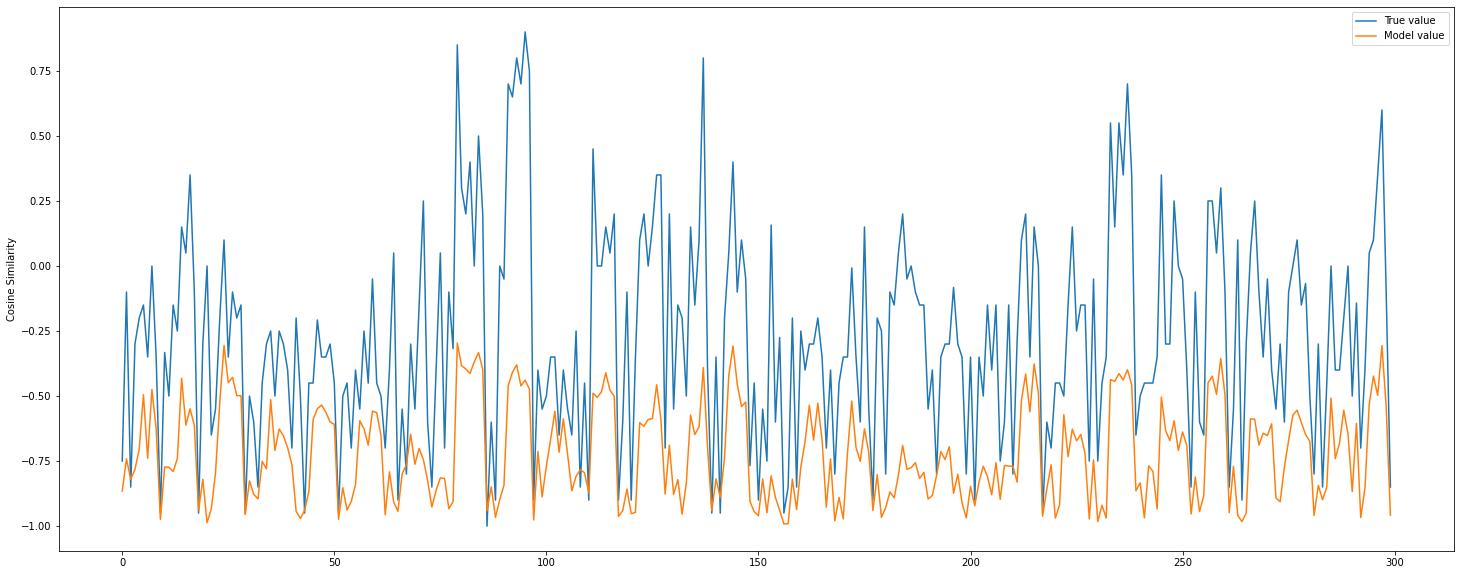

In [14]:
original_data = data.relatedness_score.iloc[:300]
model_data = cosine_similarity_bert.numpy()[:300]
testing_index = list(range(300))

fig, ax = plt.subplots(figsize=(25,10))
sn.lineplot(x=testing_index,y=original_data,label="True value")
sn.lineplot(x=testing_index,y=model_data,label="Model value")
ax.legend()
ax.set_ylabel("Cosine Similarity")
plt.show()

In [ ]:
# While comparing both the model, USE is shows a better performance